# Bank Marketing

### Import Dataset and require packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
bank_train = pd.read_csv(r'C:\Users\prjai\Capstone project\train full data.csv', sep =';')

bank_test = pd.read_csv(r"C:\Users\prjai\Capstone project\test full data.csv" , sep = ';') 

#### Insight. 

Load training data in bank_train, seperated by ;

### Top 5 values of dataset

In [3]:
bank_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### Dataset shape & Information

In [5]:
bank_train.shape

(41188, 21)

In [6]:
bank_test.shape

(4119, 21)

In [7]:
bank_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
bank_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

### Check for missing/NA value in dataset

In [9]:
bank_train.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
bank_test.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### Insight:- There is no NA value in this dataset.

### Check for Duplicates.

In [11]:
bank_train.duplicated().sum()

12

In [12]:
bank_test.duplicated().sum()

0

### Removing 12 duplicated rows from Training dataset.

In [13]:
bank_train = bank_train.drop_duplicates()

In [14]:
bank_train.shape

(41176, 21)

### Check statistics of Dataset.

In [15]:
bank_train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [16]:
bank_test.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Checking no of unique values on each column.

In [17]:
bank_train.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [18]:
bank_test.nunique()

age                67
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
duration          828
campaign           25
pdays              21
previous            7
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         234
nr.employed        11
y                   2
dtype: int64

### Define numerical & categorical column.

In [19]:
num_feature = [feature for feature in bank_train.columns if bank_train[feature].dtype != 'O']
cat_feature = [feature for feature in bank_train.columns if bank_train[feature].dtype == 'O']

print('We have {} numerical features: {}'.format(len(num_feature), num_feature))
print('We have {} categorical feature: {}'.format(len(cat_feature), cat_feature))

We have 10 numerical features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
We have 11 categorical feature: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


#### Basic information and Statistics of dataset

- We have 21 features each have 41188 rows in training dataset and 4119 rows in Testing dataset.
- Traing has 12 duplicate parameter. which has been removed and saved.
- Testing dataset all unique values.
- Dataset doesn't contain any null value.
- Both dataset contain 10 numerical feature and 11 categorical feature.

### Defining X & Y variable

In [20]:
x_train = bank_train[['age','job','marital','education','housing','loan','month','day_of_week','campaign','pdays','previous']]
x_train

,age,job,marital,education,housing,loan,month,day_of_week,campaign,pdays,previous
0,56,housemaid,married,basic.4y,no,no,may,mon,1,999,0
1,57,services,married,high.school,no,no,may,mon,1,999,0
2,37,services,married,high.school,yes,no,may,mon,1,999,0
3,40,admin.,married,basic.6y,no,no,may,mon,1,999,0
4,56,services,married,high.school,no,yes,may,mon,1,999,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,nov,fri,1,999,0
41184,46,blue-collar,married,professional.course,no,no,nov,fri,1,999,0
41185,56,retired,married,university.degree,yes,no,nov,fri,2,999,0
41186,44,technician,married,professional.course,no,no,nov,fri,1,999,0


In [21]:
x_test = bank_test[['age','job','marital','education','housing','loan','month','day_of_week','campaign','pdays','previous']]
x_test

,age,job,marital,education,housing,loan,month,day_of_week,campaign,pdays,previous
0,30,blue-collar,married,basic.9y,yes,no,may,fri,2,999,0
1,39,services,single,high.school,no,no,may,fri,4,999,0
2,25,services,married,high.school,yes,no,jun,wed,1,999,0
3,38,services,married,basic.9y,unknown,unknown,jun,fri,3,999,0
4,47,admin.,married,university.degree,yes,no,nov,mon,1,999,0
...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,yes,yes,jul,thu,1,999,0
4115,39,admin.,married,high.school,yes,no,jul,fri,1,999,0
4116,27,student,single,high.school,no,no,may,mon,2,999,1
4117,58,admin.,married,high.school,no,no,aug,fri,1,999,0


In [22]:
y_train = bank_train[['y']]
y_train

,y
0,no
1,no
2,no
3,no
4,no
...,...
41183,yes
41184,no
41185,no
41186,yes


In [23]:
y_test = bank_test[['y']]
y_test

,y
0,no
1,no
2,no
3,no
4,no
...,...
4114,no
4115,no
4116,no
4117,no


## Preprocessing data using LabelEncoder and Standarsdscaler

In [24]:
# Defining numerical and Categorical featues for training dataset.

num_train = x_train.select_dtypes(exclude='object').columns
cat_train = x_train.select_dtypes(include='object').columns

In [25]:
# Defining numerical and Categorical featues for testing dataset.

num_test = x_test.select_dtypes(exclude='object').columns
cat_test = x_test.select_dtypes(include='object').columns

In [26]:
print('num of train:',num_train)
print('cat of train:',cat_train)

print('num of test:',num_test)
print('cat of test:',cat_test)

num of train: Index(['age', 'campaign', 'pdays', 'previous'], dtype='object')
cat of train: Index(['job', 'marital', 'education', 'housing', 'loan', 'month',
       'day_of_week'],
      dtype='object')
num of test: Index(['age', 'campaign', 'pdays', 'previous'], dtype='object')
cat of test: Index(['job', 'marital', 'education', 'housing', 'loan', 'month',
       'day_of_week'],
      dtype='object')


In [27]:
# Appying One Hot Encoder and Standard Scaler for transfoming categorical and numerical data.

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

prepossesor = ColumnTransformer(
    [
        ('Categorical_data', OneHotEncoder(), cat_train),
        ('Numerical data', StandardScaler(), num_train)
    ]
)

x_train = prepossesor.fit_transform(x_train)

x_train.shape

(41176, 49)

In [28]:
prepossesor_2 = ColumnTransformer(
    [
        ('Categorical_data', OneHotEncoder(), cat_test),
        ('Numerical data', StandardScaler(), num_test)
    ]
)

x_test = prepossesor_2.fit_transform(x_test)
x_test.shape

(4119, 49)

### Visualization

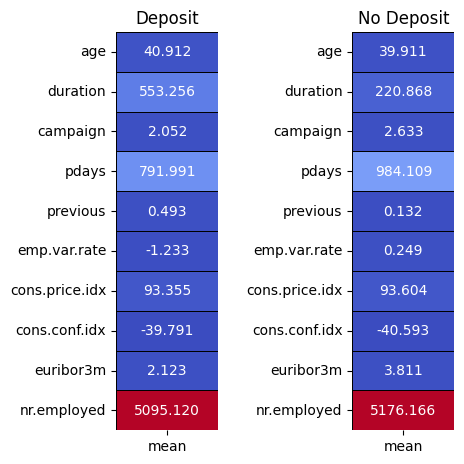

In [29]:
# camparing mean values

# Taking deposit and non deposit values from the training dataset.
# .T is used to transpose the result.
Deposit = bank_train[bank_train['y']=='yes'].describe().T     
No_Deposit = bank_train[bank_train['y']=='no'].describe().T   # .T is used to transpose the result

#subplot with size 5*5 , plots will be on one rows and two column
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5,5)) 

# Heat map plot with coolwarm tone.
# mean value of yes & no (Deposit), line width and colour is define.
# fmt='.3f' , actual value upto 3 place decimal

plt.subplot(1,2,1)
sns.heatmap(Deposit[['mean']],annot = True,linewidths = 0.4,linecolor = 'black',cbar = False, cmap='coolwarm', fmt='.3f')
plt.title('Deposit')



plt.subplot(1,2,2)
sns.heatmap(No_Deposit[['mean']], annot=True, linewidths=0.4, cmap='coolwarm', linecolor='black', cbar=False, fmt='.3f')
plt.title('No Deposit')

# Tight Padding
fig.tight_layout(pad = 2)

plt.show()

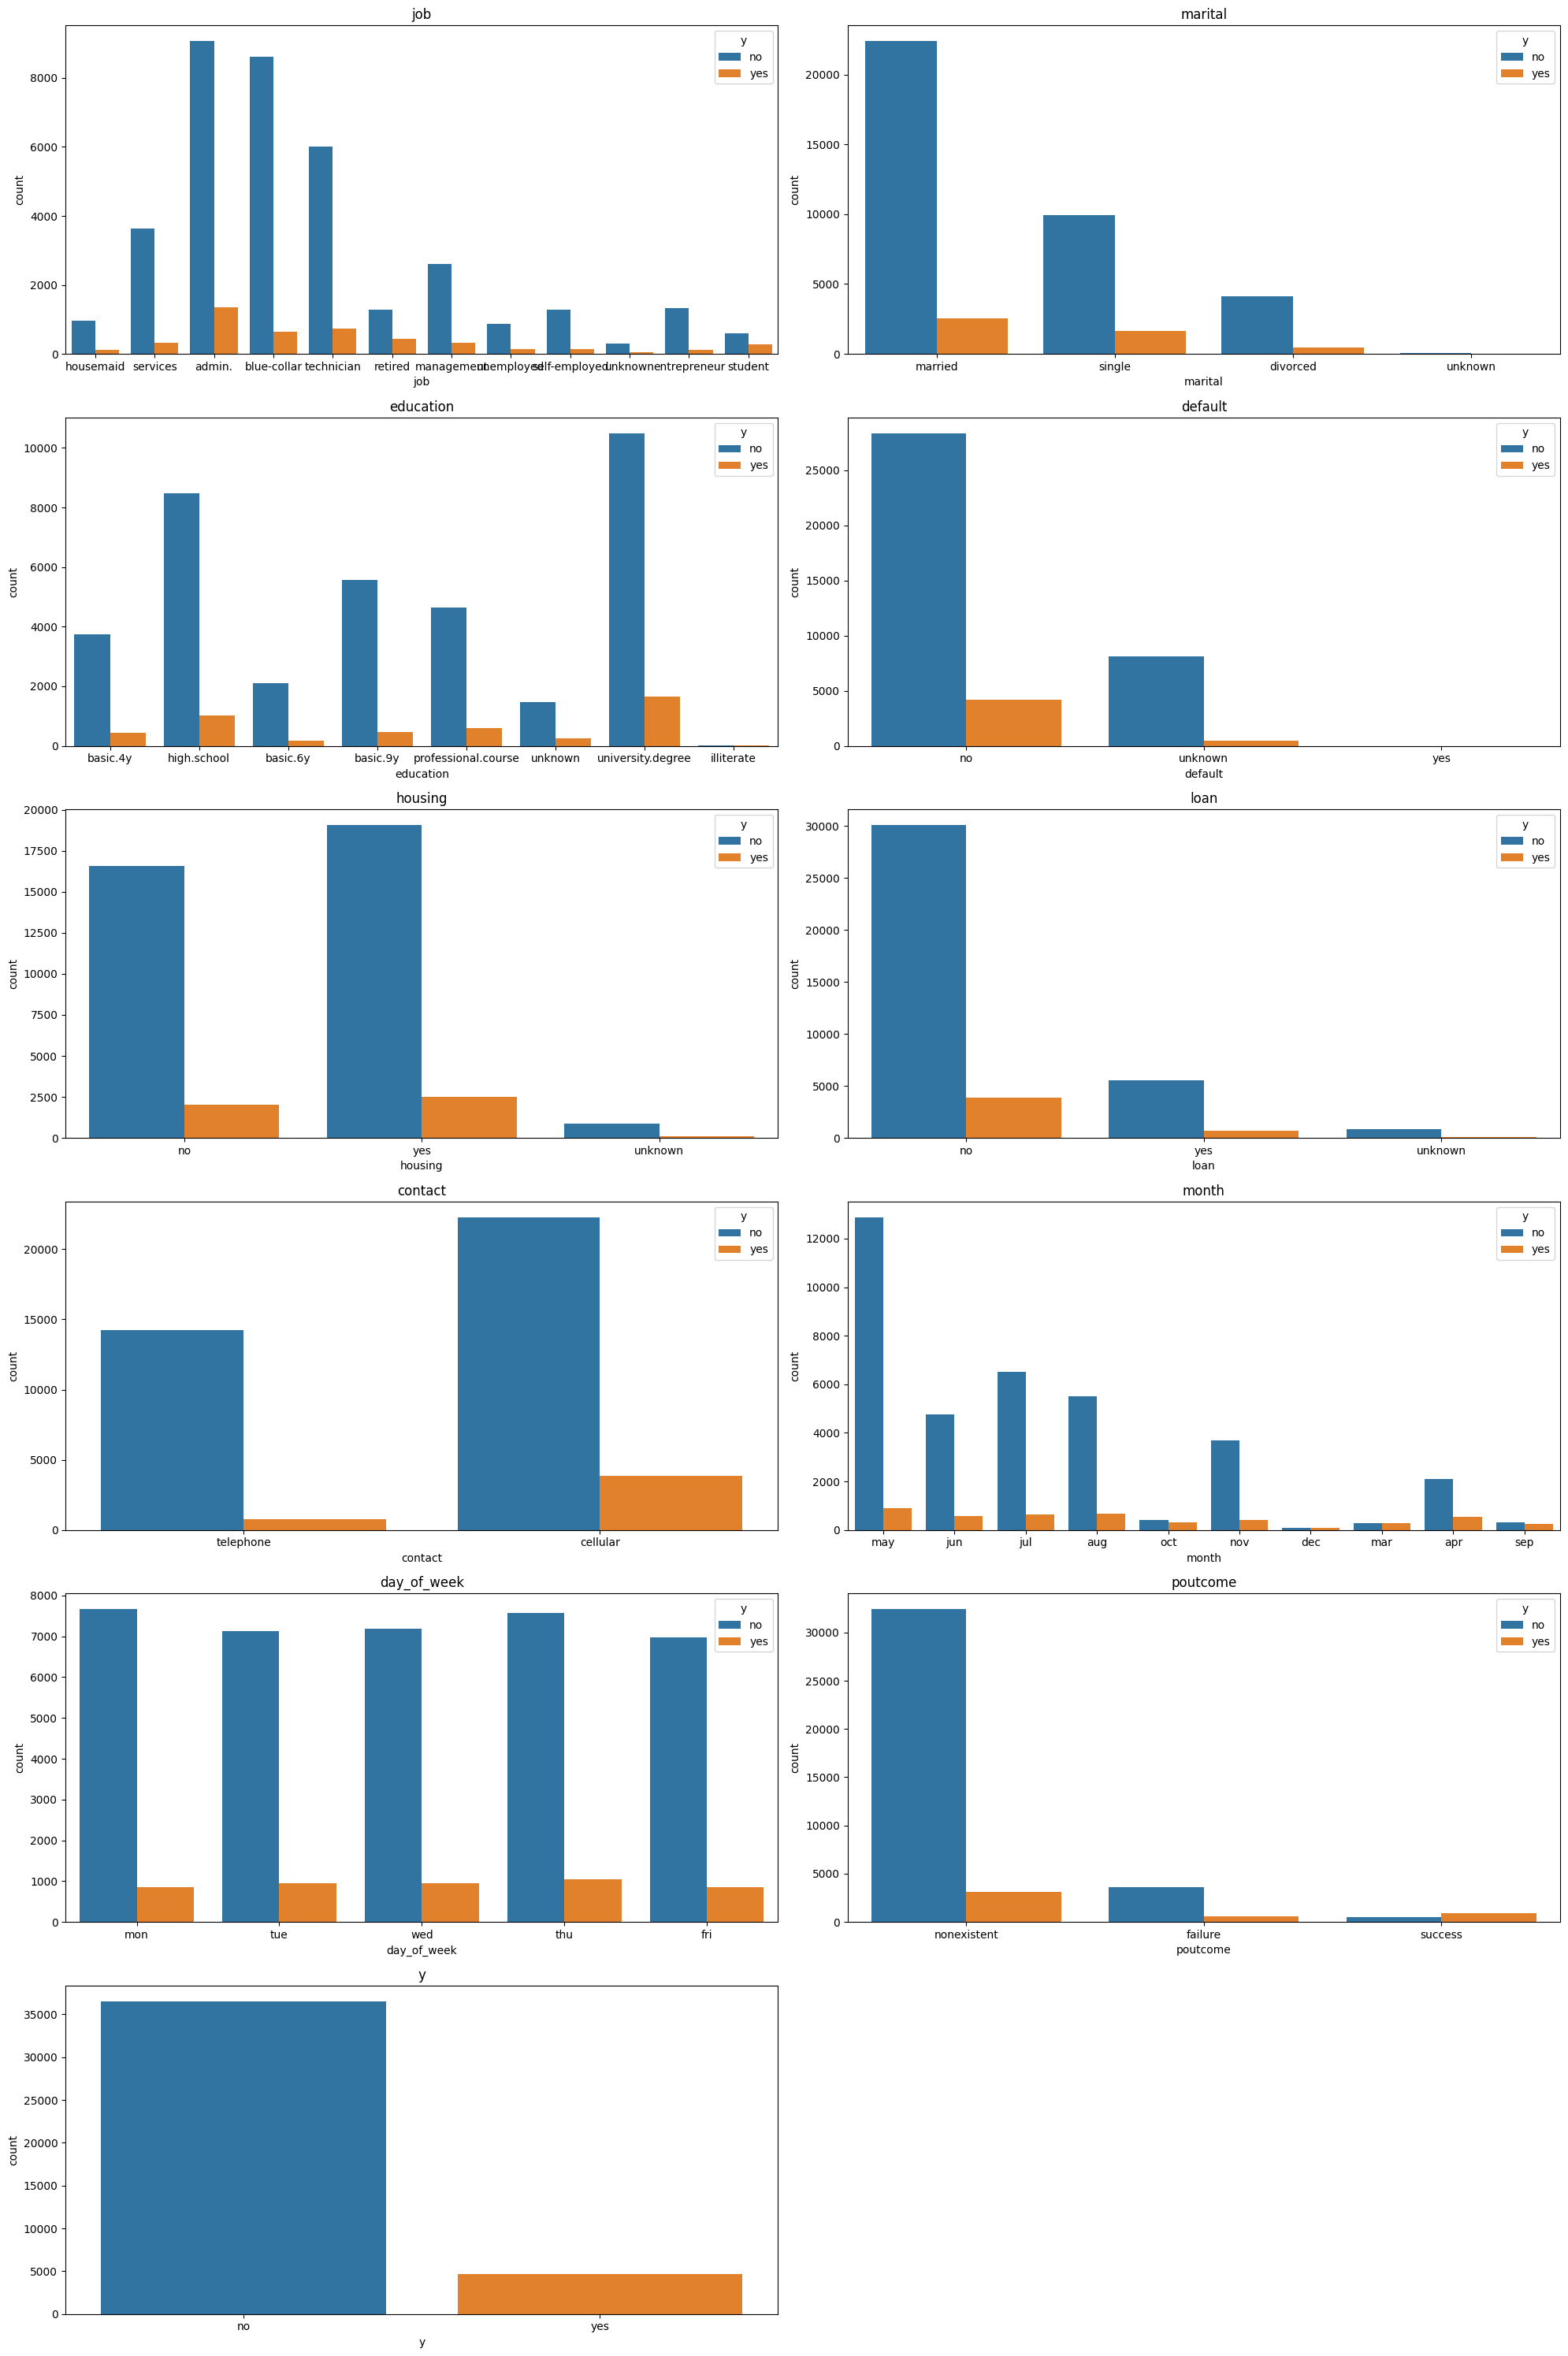

In [30]:
# Plotting for categorical columns in dataset

cat_col = bank_train.select_dtypes(include='object')
plot_col = cat_col.columns

# n will be length of total columns ie 11, n_rows to divide by two for displaying two subplots together.
n = len(plot_col)
n_rows = (n+1)//2

#subplot with size 20*30 , plots will be on 6 rows and two column
# sharey = False :- Each plot has its one y axis scale
# axes.flatten():- flatten array to 1D
fig , axes = plt.subplots(n_rows ,2 , figsize=(20,30), sharey = False)
axes = axes.flatten()

# for range 0 to length of categorical columns 
# using count plot, x axis:- categorical column (job , marital etc), y axis : 'y'
for i in range(0, n):
    sns.countplot(data=bank_train, x= plot_col[i], hue='y', ax= axes[i],)
    axes[i].set_title(plot_col[i])
    
## Hide empty subplot as no of plots is not even (here subplots was 11)
if n%2 != 0:
    axes[-1].axis('off')
    
plt.tight_layout()
plt.show()


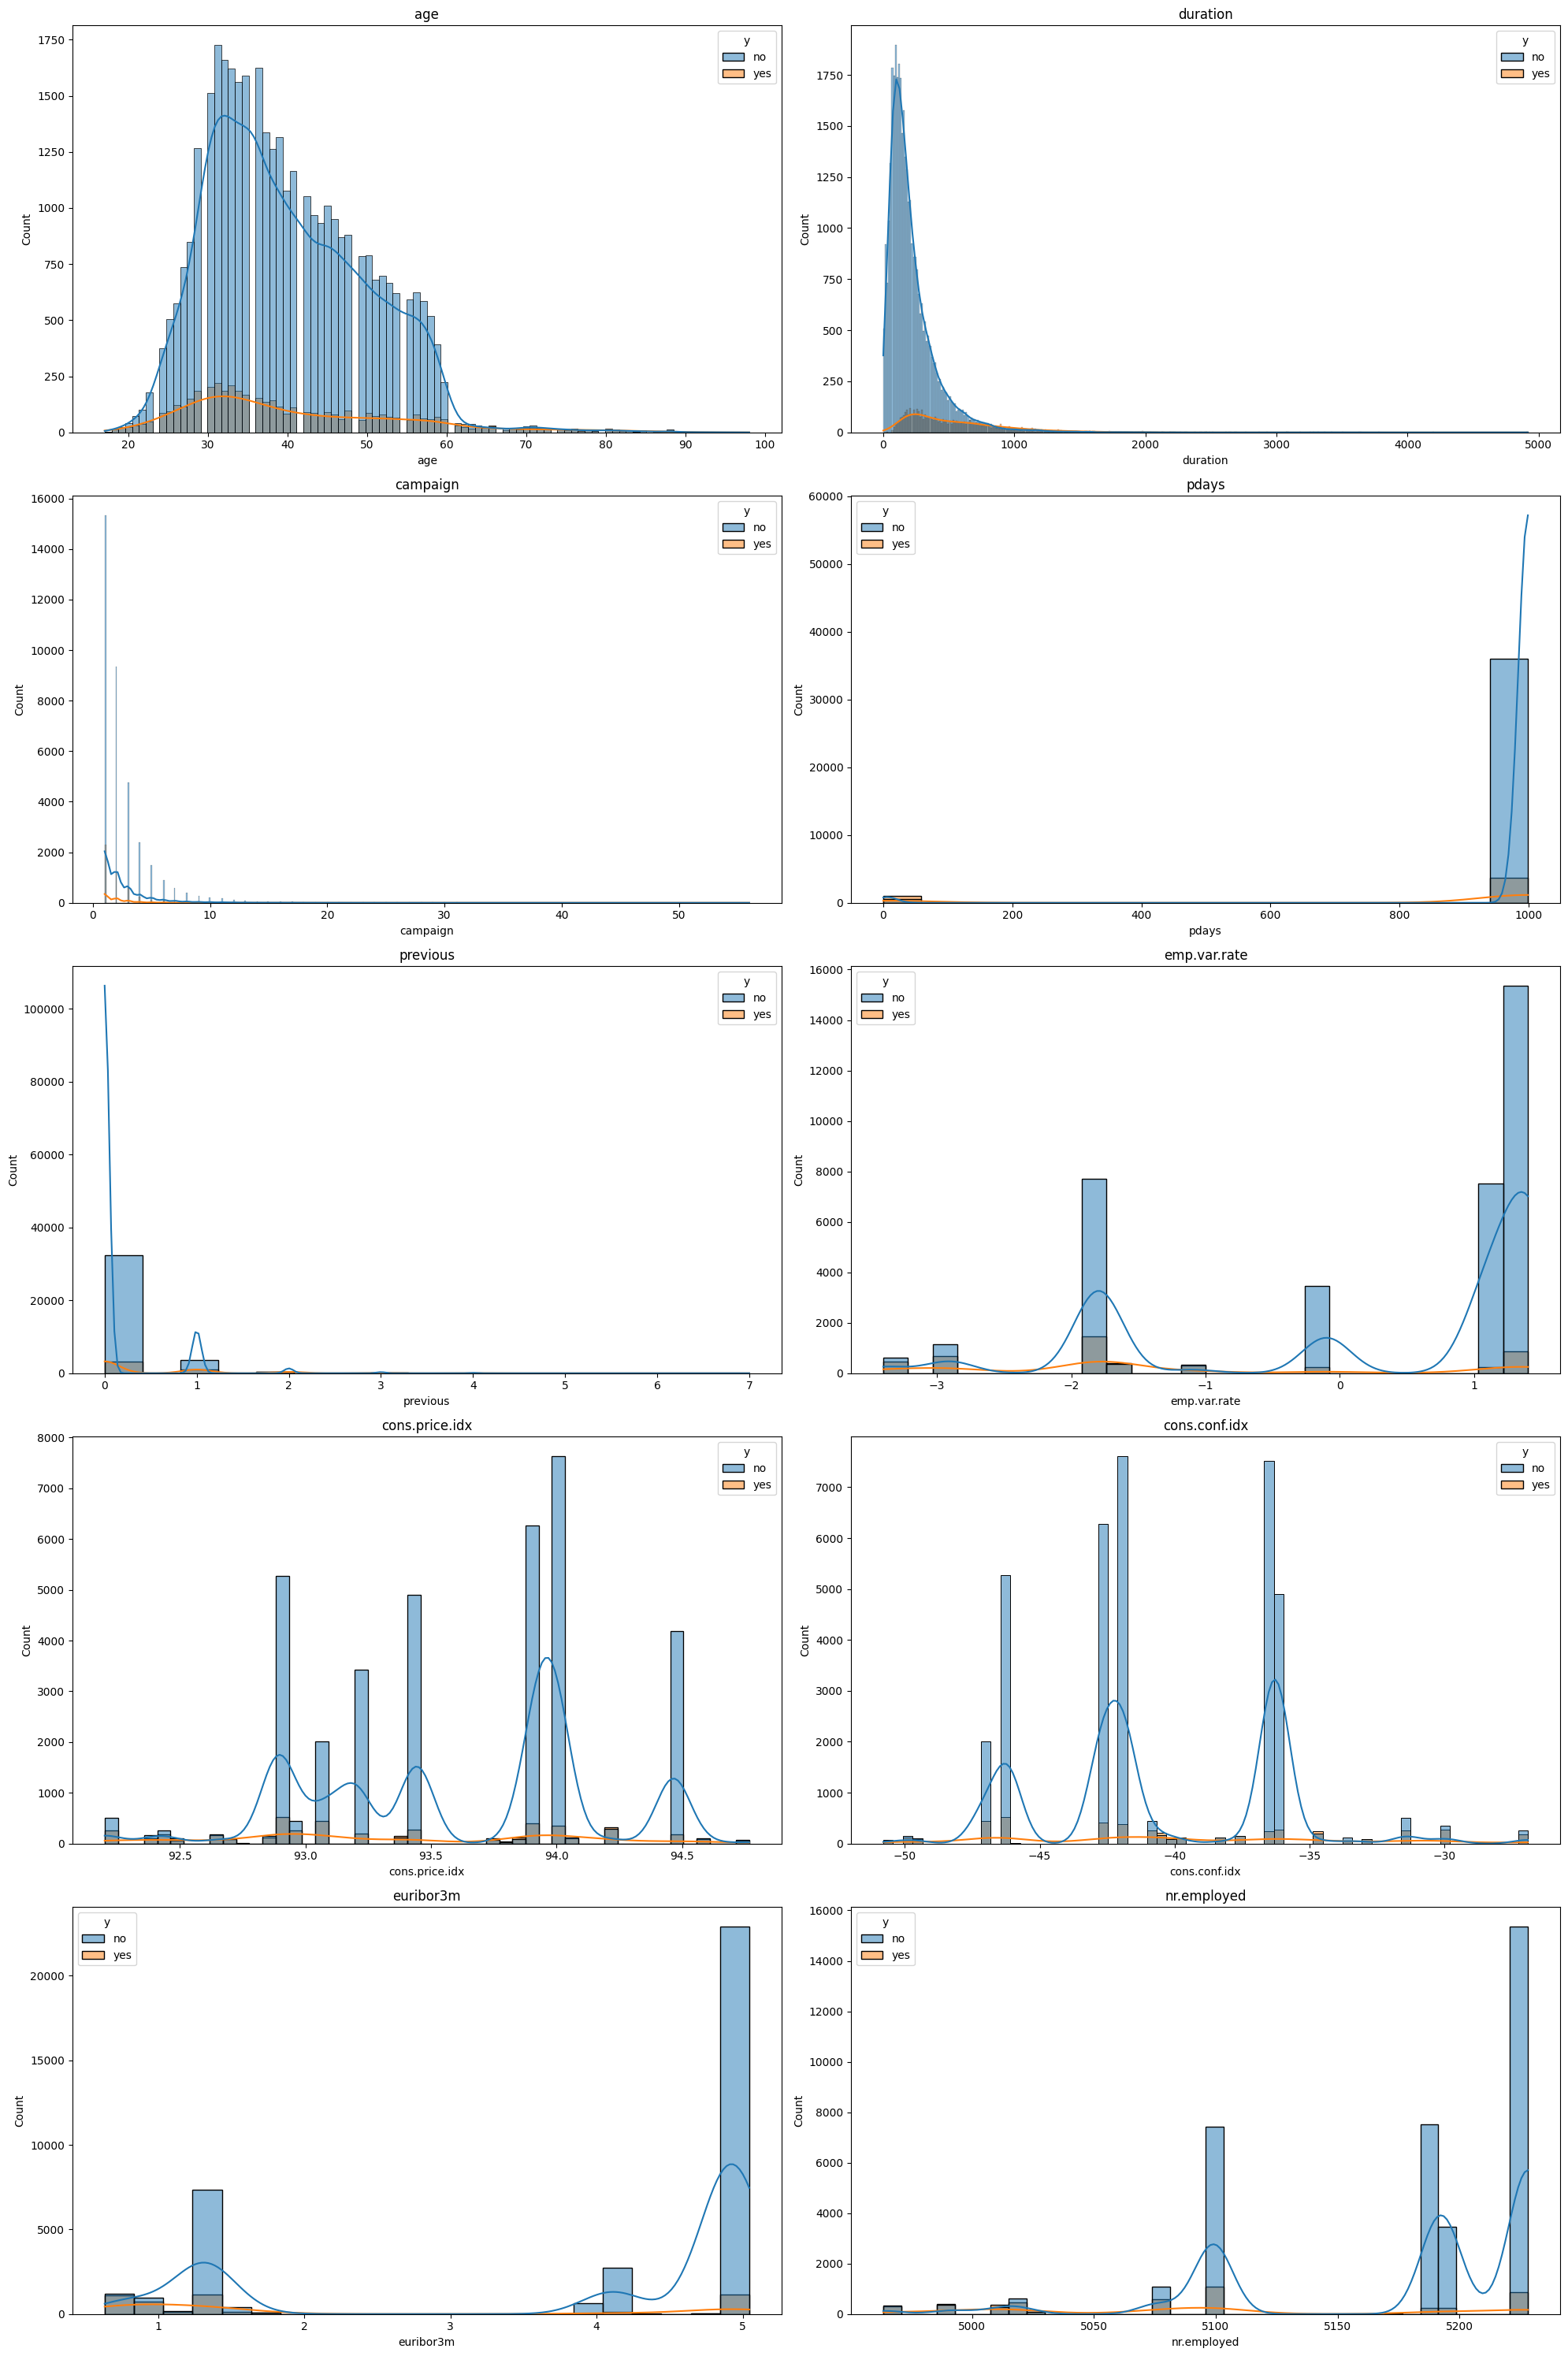

In [31]:
# Numerical column in dataset.
num_col = bank_train.select_dtypes(exclude='object')
plot_col = num_col.columns

# Length of categorical column & then divide by half
n = len(plot_col)
n_rows = (n+1)//2

# subplot for 5 rows & 2 columns
fig , axes = plt.subplots(n_rows ,2 , figsize=(20,30), sharey=False)
axes = axes.flatten()

# Histplot with training dataset, x-axis= numerical data (age, duration etc)
for i in range(0,n):
    sns.histplot(data=bank_train, x= plot_col[i], hue='y', ax= axes[i], kde=True)
    axes[i].set_title(plot_col[i])
    
      
## Hide empty subplot as no of plots is not even
if n%2 != 0:
    axes[-1].axis('off')
    
plt.tight_layout()
plt.show()

## Machine Learning Models

### Defining function for ROC curve

In [32]:
# Defining a function to plot the Receiver Operating Characteristic (ROC) curve

from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_true, y_scores):
    # Calculate the false positive rate (FPR) and true positive rate (TPR)
    fpr, tpr, _ = roc_curve(y_true, y_scores)

    # Calculate the area under the ROC curve (AUC)
    auc = roc_auc_score(y_true, y_scores)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])            # y lim is slightly heigher than max lim by 0.05
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    print(auc)

In [33]:
y_test_num = np.where(np.array(y_test) == "yes", 1, 0)

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Log_model = LogisticRegression( random_state = 0)

Log_model.fit(x_train, y_train)

log_pred = Log_model.predict(x_test)

C:\Users\prjai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prjai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
log_CR = classification_report(y_test, log_pred)
log_CM = confusion_matrix(y_test, log_pred)
log_accuracy = accuracy_score(y_test, log_pred)

print('Logistic Regression')
print('Classification report:')
print(log_CR)
print('Confusion matrix:')
print(log_CM)
print("Accuracy: {:.2f}%".format(log_accuracy))


Logistic Regression
Classification report:
              precision    recall  f1-score   support

          no       0.91      0.99      0.95      3668
         yes       0.68      0.19      0.29       451

    accuracy                           0.90      4119
   macro avg       0.80      0.59      0.62      4119
weighted avg       0.88      0.90      0.88      4119

Confusion matrix:
[[3629   39]
 [ 367   84]]
Accuracy: 0.90%


Text(33.22222222222222, 0.5, 'True value')

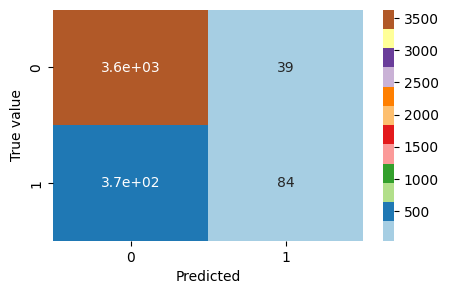

In [36]:
plt.figure(figsize=(5,3))

sns.heatmap(confusion_matrix(y_test, log_pred), annot= True, cmap='Paired')
plt.xlabel('Predicted')
plt.ylabel('True value')

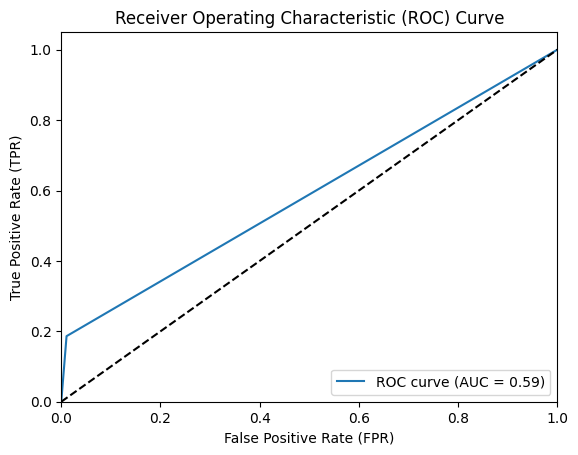

0.5878101371724533


In [37]:
log_pred_num = np.where(np.array(log_pred) == "yes", 1, 0)  # changing values from yes no to 1/0

plot_roc_curve(y_test_num, log_pred_num)            # curve between y_test & predicted from log model
log_acc = roc_auc_score(y_test_num, log_pred_num)   # calculate log accuracy (area under the curve)


In [38]:
# Store accuracy data for camparision.

Model_name =['Logistic Regression']
Accuracy_score =[log_accuracy]

data = {'Model name': Model_name, 'Accuracy score':Accuracy_score, 'ROC Accuracy score': log_acc}
Accuracy_data = pd.DataFrame(data)

print(Accuracy_data)

            Model name  Accuracy score  ROC Accuracy score
0  Logistic Regression        0.901432             0.58781


## Decision Tree

In [39]:
from sklearn import tree

DT_model = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_model.fit(x_train, y_train)

DT_pred = DT_model.predict(x_test)

In [40]:
DT_CR = classification_report(y_test, DT_pred)
DT_CM = confusion_matrix(y_test, DT_pred)
DT_accuracy = accuracy_score(y_test, DT_pred)

print('Decision tree Report')
print('Classification report:')
print(DT_CR)
print('Confusion matrix:')
print(DT_CM)
print("Accuracy: {:.2f}%".format(DT_accuracy))

Decision tree Report
Classification report:
              precision    recall  f1-score   support

          no       0.97      1.00      0.98      3668
         yes       0.95      0.75      0.84       451

    accuracy                           0.97      4119
   macro avg       0.96      0.87      0.91      4119
weighted avg       0.97      0.97      0.97      4119

Confusion matrix:
[[3651   17]
 [ 114  337]]
Accuracy: 0.97%


In [41]:
DT_accuracy

0.9681961641175042

Text(33.22222222222222, 0.5, 'True value')

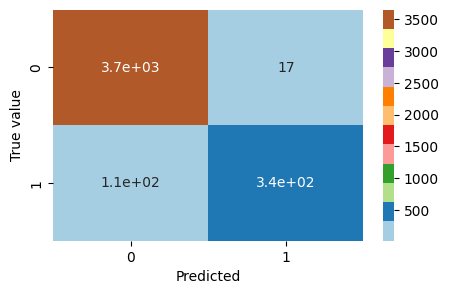

In [42]:
plt.figure(figsize=(5,3))

sns.heatmap(confusion_matrix(y_test, DT_pred), annot= True, cmap='Paired')
plt.xlabel('Predicted')
plt.ylabel('True value')

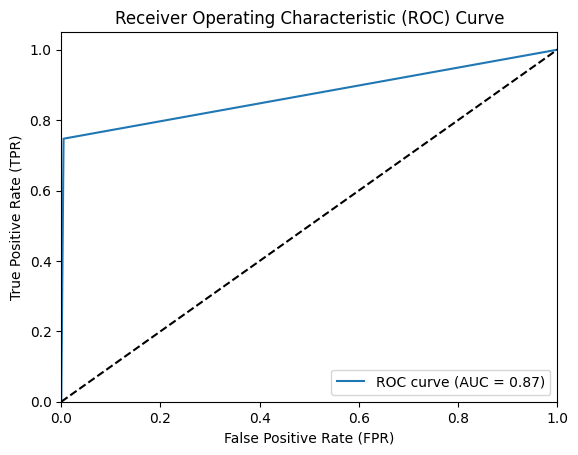

0.8712968515379611


In [43]:
DT_pred_num = np.where(np.array(DT_pred) == "yes", 1, 0)

plot_roc_curve(y_test_num, DT_pred_num)

In [44]:
DT_acc = roc_auc_score(y_test_num, DT_pred_num)

In [45]:
new_row = {'Model name': 'Decision tree classifier', 'Accuracy score': DT_accuracy, 'ROC Accuracy score': DT_acc}
Accuracy_data= Accuracy_data.append(new_row, ignore_index=True)

Accuracy_data

C:\Users\prjai\AppData\Local\Temp\ipykernel_14520\2491338671.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy_data= Accuracy_data.append(new_row, ignore_index=True)


,Model name,Accuracy score,ROC Accuracy score
0,Logistic Regression,0.901432,0.587810
1,Decision tree classifier,0.968196,0.871297


### Decision tree with max depth of 3

In [46]:
from sklearn import tree

DT_model2 = tree.DecisionTreeClassifier(max_depth=3)
DT_model2.fit(x_train, y_train)

DT_pred2 = DT_model2.predict(x_test)


In [47]:
DT_CR2 = classification_report(y_test, DT_pred2)
DT_CM2 = confusion_matrix(y_test, DT_pred2)
DT_accuracy2 = accuracy_score(y_test, DT_pred2)

print('Decision tree Report')
print('Classification report:')
print(DT_CR2)
print('Confusion matrix:')
print(DT_CM2)
print("Accuracy: {:.2f}%".format(DT_accuracy2))

Decision tree Report
Classification report:
              precision    recall  f1-score   support

          no       0.91      0.99      0.95      3668
         yes       0.65      0.21      0.31       451

    accuracy                           0.90      4119
   macro avg       0.78      0.60      0.63      4119
weighted avg       0.88      0.90      0.88      4119

Confusion matrix:
[[3617   51]
 [ 358   93]]
Accuracy: 0.90%


Text(33.22222222222222, 0.5, 'True value')

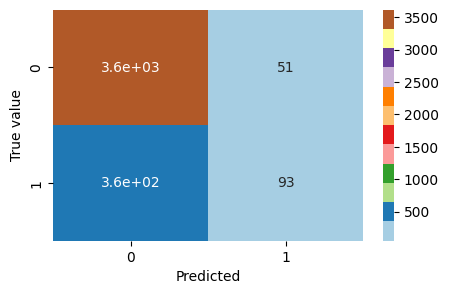

In [48]:
plt.figure(figsize=(5,3))

sns.heatmap(confusion_matrix(y_test, DT_pred2), annot= True, cmap='Paired')
plt.xlabel('Predicted')
plt.ylabel('True value')

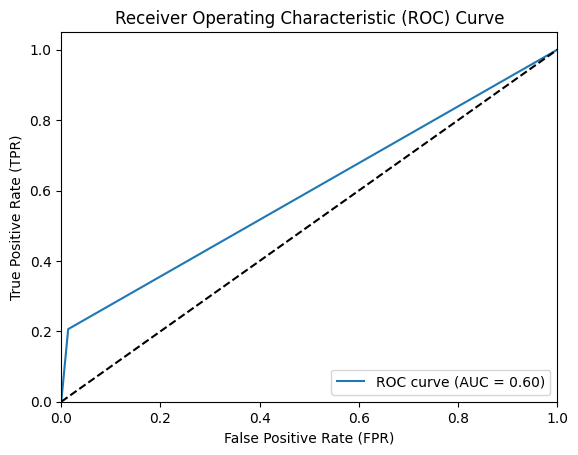

0.5961521954121098


In [49]:
DT_pred_num2 = np.where(np.array(DT_pred2) == "yes", 1, 0)

plot_roc_curve(y_test_num, DT_pred_num2)

DT_acc2 = roc_auc_score(y_test_num, DT_pred_num2)

In [50]:
new_row = {'Model name': 'Decision tree max depth 3', 'Accuracy score': DT_accuracy2, 'ROC Accuracy score': DT_acc2}
Accuracy_data= Accuracy_data.append(new_row, ignore_index=True)

Accuracy_data

C:\Users\prjai\AppData\Local\Temp\ipykernel_14520\2316958203.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy_data= Accuracy_data.append(new_row, ignore_index=True)


,Model name,Accuracy score,ROC Accuracy score
0,Logistic Regression,0.901432,0.587810
1,Decision tree classifier,0.968196,0.871297
2,Decision tree max depth 3,0.900704,0.596152


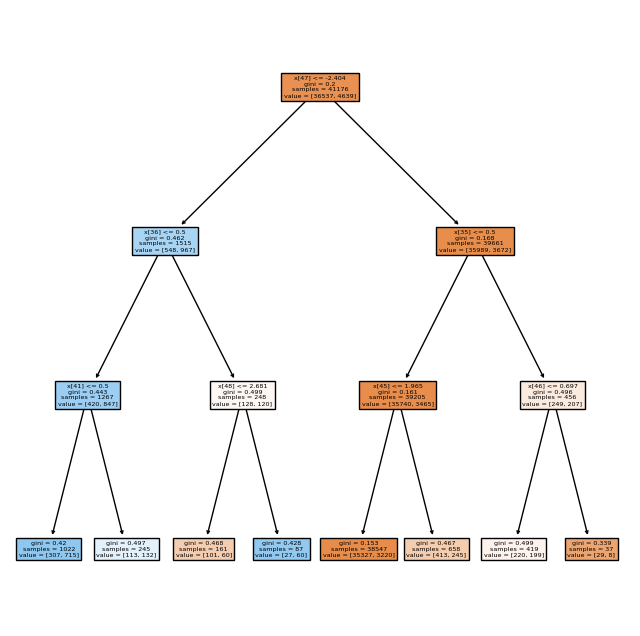

In [51]:
plt.figure(figsize=(8,8))
_ = tree.plot_tree(DT_model2 , filled = True)

## K Nearest Neighbour KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier

# no of nearest neighbour to be 5
#  p = 2 results in the standard Euclidean distance.
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(x_train, y_train)


C:\Users\prjai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [53]:
KNN_pred = KNN_model.predict(x_test)

In [54]:
KNN_CR = classification_report(y_test, KNN_pred)
KNN_CM = confusion_matrix(y_test, KNN_pred)
KNN_accuracy = accuracy_score(y_test, KNN_pred)

print('K Nearest Neighbour report')
print('Classification report:')
print(KNN_CR)
print('Confusion matrix:')
print(KNN_CM)
print("Accuracy: {:.2f}%".format(KNN_accuracy))

K Nearest Neighbour report
Classification report:
              precision    recall  f1-score   support

          no       0.92      0.99      0.95      3668
         yes       0.71      0.30      0.42       451

    accuracy                           0.91      4119
   macro avg       0.82      0.64      0.69      4119
weighted avg       0.90      0.91      0.89      4119

Confusion matrix:
[[3613   55]
 [ 316  135]]
Accuracy: 0.91%


In [55]:
KNN_accuracy

0.9099295945617868

Text(33.22222222222222, 0.5, 'True value')

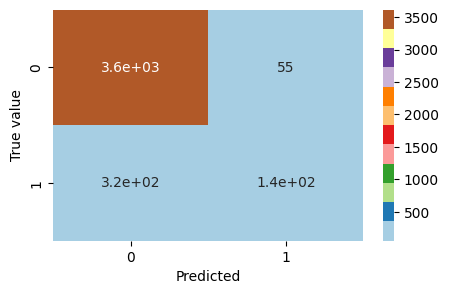

In [56]:
plt.figure(figsize=(5,3))

sns.heatmap(confusion_matrix(y_test, KNN_pred), annot= True, cmap='Paired')
plt.xlabel('Predicted')
plt.ylabel('True value')

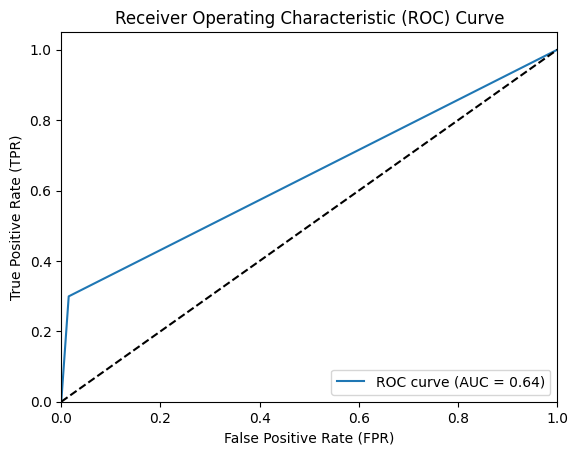

0.6421701320463189


In [57]:
KNN_pred_num = np.where(np.array(KNN_pred) == "yes", 1, 0)

plot_roc_curve(y_test_num, KNN_pred_num)

KNN_acc = roc_auc_score(y_test_num, KNN_pred_num)

In [58]:
new_row = {'Model name': 'KNN Classifier', 'Accuracy score': KNN_accuracy, 'ROC Accuracy score': KNN_acc}
Accuracy_data= Accuracy_data.append(new_row, ignore_index=True)

Accuracy_data

C:\Users\prjai\AppData\Local\Temp\ipykernel_14520\4116044045.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy_data= Accuracy_data.append(new_row, ignore_index=True)


,Model name,Accuracy score,ROC Accuracy score
0,Logistic Regression,0.901432,0.587810
1,Decision tree classifier,0.968196,0.871297
2,Decision tree max depth 3,0.900704,0.596152
3,KNN Classifier,0.909930,0.642170


C:\Users\prjai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\prjai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\prjai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\prjai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: 

<function matplotlib.pyplot.legend(*args, **kwargs)>

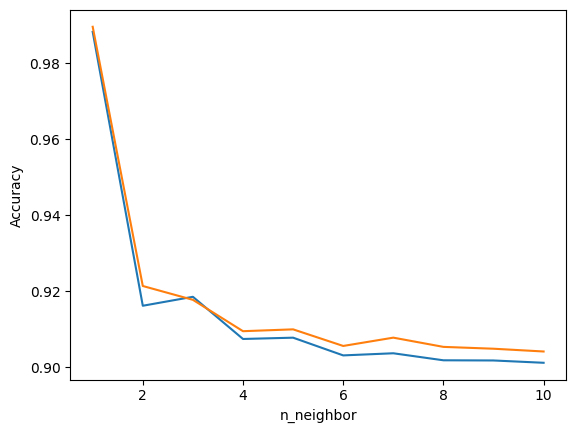

In [60]:
neighbors_settings = range(1, 11)     # Nearest neighbour range 

training_accuracy = []                # accuracy is initally set as empty for training and testing.
test_accuracy = []
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)   # KNN model running on loop
    clf.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))  # Recording accuracy data and adding on the list.
    # record generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")  # Plot above data
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbor")
plt.legend

## Support Vector Machine

In [59]:
from sklearn import svm

svm_model = svm.SVC(kernel ='linear')
svm_model.fit(x_train, y_train)

C:\Users\prjai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [60]:
svm_pred = svm_model.predict(x_test)

In [61]:
svm_CR = classification_report(y_test, svm_pred)
svm_CM = confusion_matrix(y_test, svm_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

print('Support Vector Machine Report')
print('Classification report:')
print(svm_CR)
print('Confusion matrix:')
print(svm_CM)
print("Accuracy: {:.2f}%".format(svm_accuracy))

Support Vector Machine Report
Classification report:
              precision    recall  f1-score   support

          no       0.91      0.98      0.95      3668
         yes       0.62      0.22      0.33       451

    accuracy                           0.90      4119
   macro avg       0.77      0.60      0.64      4119
weighted avg       0.88      0.90      0.88      4119

Confusion matrix:
[[3608   60]
 [ 351  100]]
Accuracy: 0.90%


In [62]:
svm_accuracy

0.9002184996358339

Text(33.22222222222222, 0.5, 'True value')

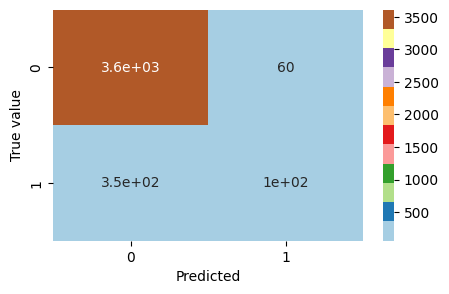

In [63]:
plt.figure(figsize=(5,3))

sns.heatmap(confusion_matrix(y_test, svm_pred), annot= True, cmap='Paired')
plt.xlabel('Predicted')
plt.ylabel('True value')

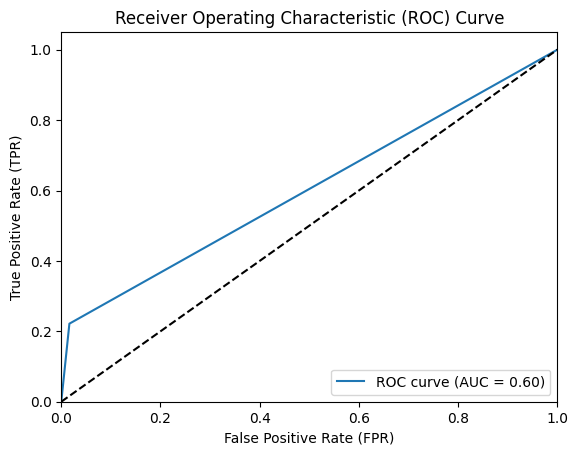

0.6026859009543798


In [64]:
svm_pred_num = np.where(np.array(svm_pred) == "yes", 1, 0)

plot_roc_curve(y_test_num, svm_pred_num)

svm_acc = roc_auc_score(y_test_num, svm_pred_num)

In [65]:
new_row = {'Model name': 'Support Vector Machine', 'Accuracy score': svm_accuracy, 'ROC Accuracy score': svm_acc}
Accuracy_data= Accuracy_data.append(new_row, ignore_index=True)

Accuracy_data

C:\Users\prjai\AppData\Local\Temp\ipykernel_14520\646041391.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy_data= Accuracy_data.append(new_row, ignore_index=True)


,Model name,Accuracy score,ROC Accuracy score
0,Logistic Regression,0.901432,0.587810
1,Decision tree classifier,0.968196,0.871297
2,Decision tree max depth 3,0.900704,0.596152
3,KNN Classifier,0.909930,0.642170
4,Support Vector Machine,0.900218,0.602686


## Gaussian Naive Bayes

In [66]:
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

GNN_model = GaussianNB()
GNN_model.fit(x_train.toarray(), y_train)      # to convert into dense array format.

C:\Users\prjai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [67]:
GNN_pred = GNN_model.predict(x_test.toarray())

In [68]:
GNN_CR = classification_report(y_test, GNN_pred)
GNN_CM = confusion_matrix(y_test, GNN_pred)
GNN_accuracy = accuracy_score(y_test, GNN_pred)

print('Gaussian Naive Bayes report')
print('Classification report:')
print(GNN_CR)
print('Confusion matrix:')
print(GNN_CM)
print("Accuracy: {:.2f}%".format(GNN_accuracy))

Gaussian Naive Bayes report
Classification report:
              precision    recall  f1-score   support

          no       0.93      0.92      0.93      3668
         yes       0.40      0.41      0.40       451

    accuracy                           0.87      4119
   macro avg       0.66      0.67      0.67      4119
weighted avg       0.87      0.87      0.87      4119

Confusion matrix:
[[3386  282]
 [ 265  186]]
Accuracy: 0.87%


Text(33.22222222222222, 0.5, 'True value')

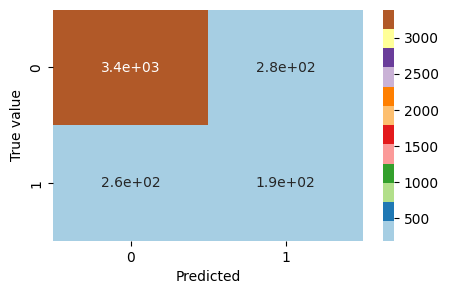

In [69]:
plt.figure(figsize=(5,3))

sns.heatmap(confusion_matrix(y_test, GNN_pred), annot= True, cmap='Paired')
plt.xlabel('Predicted')
plt.ylabel('True value')

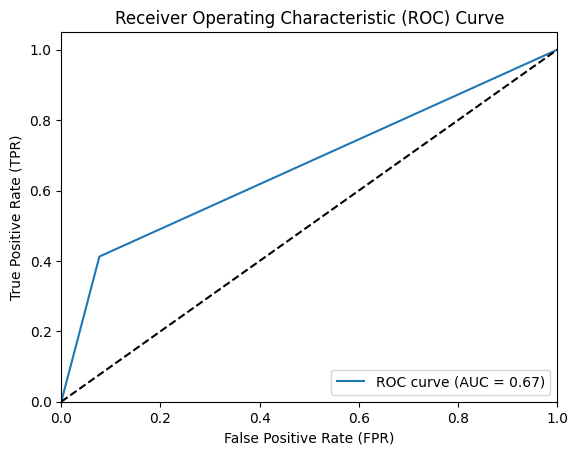

0.6677678586540995


In [70]:
GNN_pred_num = np.where(np.array(GNN_pred) == "yes", 1, 0)

plot_roc_curve(y_test_num, GNN_pred_num)

GNN_acc = roc_auc_score(y_test_num, GNN_pred_num)

In [71]:
new_row = {'Model name': 'Gaussian Naive Bayes', 'Accuracy score': GNN_accuracy, 'ROC Accuracy score': GNN_acc}
Accuracy_data= Accuracy_data.append(new_row, ignore_index=True)

Accuracy_data

C:\Users\prjai\AppData\Local\Temp\ipykernel_14520\2231726838.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy_data= Accuracy_data.append(new_row, ignore_index=True)


,Model name,Accuracy score,ROC Accuracy score
0,Logistic Regression,0.901432,0.587810
1,Decision tree classifier,0.968196,0.871297
2,Decision tree max depth 3,0.900704,0.596152
3,KNN Classifier,0.909930,0.642170
4,Support Vector Machine,0.900218,0.602686
5,Gaussian Naive Bayes,0.867201,0.667768


## Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

RFC_model = RandomForestClassifier(n_estimators=20, criterion= 'entropy')
RFC_model.fit(x_train, y_train)


## RFC_model = RandomForestClassifier(n_estimators=100, max_Depth = None, random state= 42 criterion= 'entropy')
## n_estimator = No of forest.
## None = Expand untill all leaves are pure.

C:\Users\prjai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', n_estimators=20)

In [73]:
RFC_pred = RFC_model.predict(x_test)

In [75]:
RFC_CR = classification_report(y_test, RFC_pred)
RFC_CM = confusion_matrix(y_test, RFC_pred)
RFC_accuracy = accuracy_score(y_test, RFC_pred)

print('Random Forest Classifier')
print('Classification report:')
print(RFC_CR)
print('Confusion matrix:')
print(RFC_CM)
print("Accuracy: {:.2f}%".format(RFC_accuracy))

Random Forest Classifier
Classification report:
              precision    recall  f1-score   support

          no       0.98      0.99      0.99      3668
         yes       0.94      0.84      0.89       451

    accuracy                           0.98      4119
   macro avg       0.96      0.92      0.94      4119
weighted avg       0.98      0.98      0.98      4119

Confusion matrix:
[[3646   22]
 [  73  378]]
Accuracy: 0.98%


Text(33.22222222222222, 0.5, 'True value')

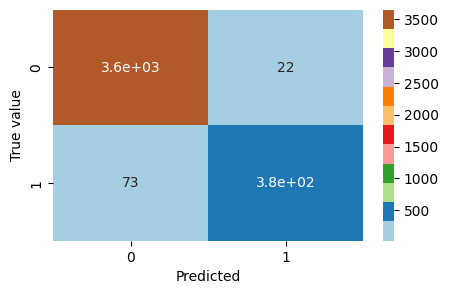

In [76]:
plt.figure(figsize=(5,3))

sns.heatmap(confusion_matrix(y_test, RFC_pred), annot= True, cmap='Paired')
plt.xlabel('Predicted')
plt.ylabel('True value')

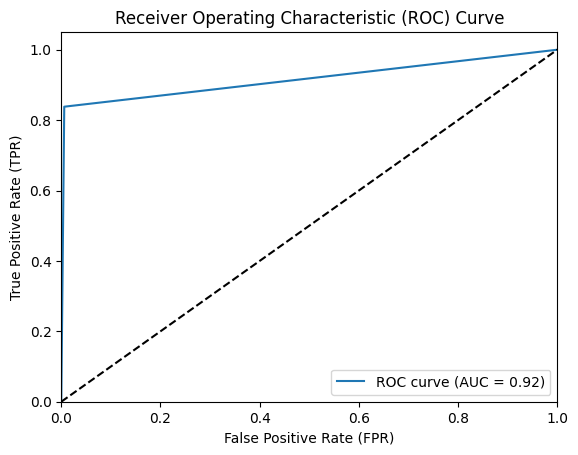

0.9160698266544477


In [77]:
RFC_pred_num = np.where(np.array(RFC_pred) == "yes", 1, 0)

plot_roc_curve(y_test_num, RFC_pred_num)

RFC_acc = roc_auc_score(y_test_num, RFC_pred_num)

In [78]:
new_row = {'Model name': 'Random Forest Classifier', 'Accuracy score': RFC_accuracy, 'ROC Accuracy score': RFC_acc}
Accuracy_data= Accuracy_data.append(new_row, ignore_index=True)

Accuracy_data

C:\Users\prjai\AppData\Local\Temp\ipykernel_14520\3920450350.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy_data= Accuracy_data.append(new_row, ignore_index=True)


,Model name,Accuracy score,ROC Accuracy score
0,Logistic Regression,0.901432,0.587810
1,Decision tree classifier,0.968196,0.871297
2,Decision tree max depth 3,0.900704,0.596152
3,KNN Classifier,0.909930,0.642170
4,Support Vector Machine,0.900218,0.602686
5,Gaussian Naive Bayes,0.867201,0.667768
6,Random Forest Classifier,0.976936,0.916070


## AdaBoost Classifier

In [79]:
from sklearn.ensemble import AdaBoostClassifier

ADA_model = AdaBoostClassifier()
ADA_model.fit(x_train, y_train)

C:\Users\prjai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [80]:
ADA_pred = ADA_model.predict(x_test)

In [81]:
ADA_CR = classification_report(y_test, ADA_pred)
ADA_CM = confusion_matrix(y_test, ADA_pred)
ADA_accuracy = accuracy_score(y_test, ADA_pred)

print('AdaBoost Classifier')
print('Classification report:')
print(ADA_CR)
print('Confusion matrix:')
print(ADA_CM)
print("Accuracy: {:.2f}%".format(ADA_accuracy))

AdaBoost Classifier
Classification report:
              precision    recall  f1-score   support

          no       0.91      0.98      0.95      3668
         yes       0.61      0.24      0.34       451

    accuracy                           0.90      4119
   macro avg       0.76      0.61      0.64      4119
weighted avg       0.88      0.90      0.88      4119

Confusion matrix:
[[3599   69]
 [ 343  108]]
Accuracy: 0.90%


Text(33.22222222222222, 0.5, 'True value')

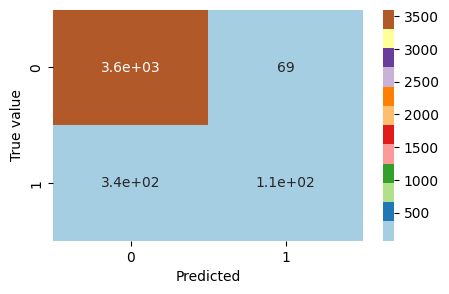

In [82]:
plt.figure(figsize=(5,3))

sns.heatmap(confusion_matrix(y_test, ADA_pred), annot= True, cmap='Paired')
plt.xlabel('Predicted')
plt.ylabel('True value')

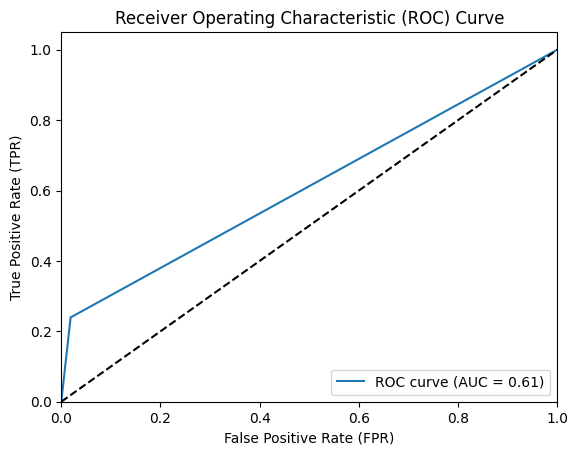

0.6103282539467608


In [83]:
ADA_pred_num = np.where(np.array(ADA_pred) == "yes", 1, 0)

plot_roc_curve(y_test_num, ADA_pred_num)

ADA_acc = roc_auc_score(y_test_num, ADA_pred_num)

In [84]:
new_row = {'Model name': 'ADABoost Classifier', 'Accuracy score': ADA_accuracy, 'ROC Accuracy score': ADA_acc}
Accuracy_data= Accuracy_data.append(new_row, ignore_index=True)

Accuracy_data

C:\Users\prjai\AppData\Local\Temp\ipykernel_14520\4237869490.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy_data= Accuracy_data.append(new_row, ignore_index=True)


,Model name,Accuracy score,ROC Accuracy score
0,Logistic Regression,0.901432,0.587810
1,Decision tree classifier,0.968196,0.871297
2,Decision tree max depth 3,0.900704,0.596152
3,KNN Classifier,0.909930,0.642170
4,Support Vector Machine,0.900218,0.602686
5,Gaussian Naive Bayes,0.867201,0.667768
6,Random Forest Classifier,0.976936,0.916070
7,ADABoost Classifier,0.899976,0.610328


In [85]:
print(Accuracy_data)

                  Model name  Accuracy score  ROC Accuracy score
0        Logistic Regression        0.901432            0.587810
1   Decision tree classifier        0.968196            0.871297
2  Decision tree max depth 3        0.900704            0.596152
3             KNN Classifier        0.909930            0.642170
4     Support Vector Machine        0.900218            0.602686
5       Gaussian Naive Bayes        0.867201            0.667768
6   Random Forest Classifier        0.976936            0.916070
7        ADABoost Classifier        0.899976            0.610328
